# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

### What are the predictors and dependent variable ?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

There will be a positive correlation between high GPA scores and admission to graduate schools. More specifically, student's with higher GPA scores will be more likely to be admitted than those with lower GPA scores. 

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

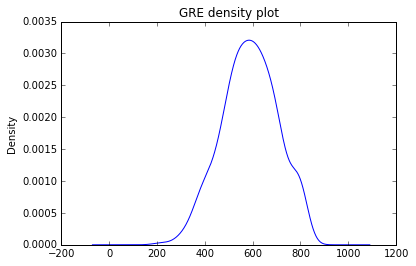

In [4]:
# plot the distribution of each variable 
df_raw['gre'].plot(kind='density', title='GRE density plot')

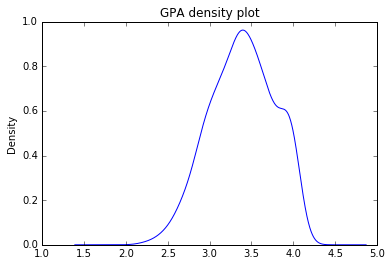

In [5]:
df_raw['gpa'].plot(kind='density', title='GPA density plot')

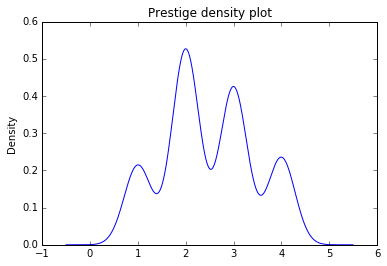

In [6]:
df_raw['prestige'].plot(kind='density', title='Prestige density plot')

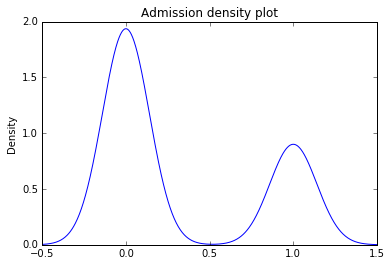

In [7]:
df_raw['admit'].plot(kind='density', title='Admission density plot')

### Find the correlation of each feature with admission

In [8]:
df.corr()["admit"]["gre"]

0.18120206608753531

In [9]:
df.corr()["admit"]["gpa"]

0.17411637827066148

In [10]:
df.corr()["admit"]["prestige"]

-0.24356302977827157

### How do you deal with the prestige feature?

In [13]:
from sklearn import linear_model as lm
prestigedummy = pd.get_dummies(df.prestige,prefix="prestige")

In [14]:
prestigedummy_join = df.join(prestigedummy)
prestigedummy_join.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [17]:
from sklearn import preprocessing as pp
features=[u'gre', u'gpa',u'prestige_1.0',u'prestige_2.0', u'prestige_4.0']
features_scaler = pp.StandardScaler().fit(prestigedummy_join[features])
features_scaled = features_scaler.fit_transform(prestigedummy_join[features])

In [18]:
from sklearn import grid_search
parameters = {'Cs':[i for i in range(1, 10)],'class_weight':['balanced']}
lm = grid_search.GridSearchCV(lm.LogisticRegressionCV(), parameters,
                               scoring='accuracy')
lm.fit(features_scaled, prestigedummy_join.admit)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [19]:
lm.best_estimator_ # For Logistic Regression

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
lm.best_score_

0.61964735516372793

### What is the most important feature that contributes to the students probability of admission? 

It can be seen above that prestige is the most important feature that contributes to the student's probability of admission.